In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as sqlConnect
import numpy as np

In [3]:
db = sqlConnect.connect(host="localhost",username="root",password="12345",database="ecommerce")
cur = db.cursor()

# Q1 List all unique cities where customers are located ?

In [39]:
query = """ SELECT DISTINCT customer_city
FROM customers;"""
cur.execute(query);
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Q2 Count The number of orders placed in 2017 ?

In [40]:
query = """SELECT COUNT(order_id) AS order_count
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2017;"""

cur.execute(query)
data = cur.fetchall();
print(f"Total Orders Placed in 2017 are : {data[0][0]}")

Total Orders Placed in 2017 are : 90202


# Q3 Find Total Sales Per Category ?

In [41]:
query = """ SELECT 
    products.product_category AS category,
    ROUND(SUM(payments.payment_value), 2) AS sales
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    products.product_category
ORDER BY 
    sales DESC;
"""

cur.execute(query)
data = cur.fetchall();
data

[('bed table bath', 3425107.34),
 ('HEALTH BEAUTY', 3314746.24),
 ('computer accessories', 3170660.89),
 ('Furniture Decoration', 2860352.78),
 ('Watches present', 2858433.36),
 ('sport leisure', 2784255.12),
 ('housewares', 2189516.26),
 ('automotive', 1704588.66),
 ('Garden tools', 1676561.5),
 ('Cool Stuff', 1559396.0),
 ('Furniture office', 1293652.97),
 ('toys', 1238075.38),
 ('babies', 1079691.32),
 ('perfumery', 1013477.32),
 ('telephony', 973764.1),
 ('stationary store', 634880.14),
 ('pet Shop', 622537.94),
 ('PCs', 558243.1),
 ('electronics', 519714.2),
 (None, 505603.42),
 ('Construction Tools Construction', 482951.26),
 ('musical instruments', 466148.24),
 ('electrostile', 451168.76),
 ('Fashion Bags and Accessories', 436316.56),
 ('fixed telephony', 414020.52),
 ('Games consoles', 390960.76),
 ('Bags Accessories', 374302.58),
 ('Casa Construcao', 273290.58),
 ('Room Furniture', 272277.54),
 ('ELECTRICES 2', 249126.92),
 ('Agro Industria e Comercio', 237461.22),
 ('home app

In [42]:
df = pd.DataFrame(data,columns =["Category","Sales"]);
df

,Category,Sales
0,bed table bath,3425107.34
1,HEALTH BEAUTY,3314746.24
2,computer accessories,3170660.89
3,Furniture Decoration,2860352.78
4,Watches present,2858433.36
...,...,...
69,PC Gamer,4348.86
70,House Comfort 2,3421.08
71,cds music dvds,2398.86
72,Fashion Children's Clothing,1571.34


# Calculate the percentage of orders that were paid in installments

In [43]:
query = """ SELECT 
    ROUND(
        (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 
        2
    ) AS percentage_with_installments
FROM 
    payments; 
"""

cur.execute(query)
data = cur.fetchall();
data

[(Decimal('100.00'),)]

# Count The Number of Customers in each state

In [44]:
query = """ SELECT 
    customer_state,
    COUNT(customer_id) AS customer_count
FROM 
    customers
GROUP BY 
    customer_state
ORDER BY 
    customer_count DESC;
"""

cur.execute(query)
data = cur.fetchall();
data
customer_count_of_every_State = pd.DataFrame(data,columns=['State','Number of Customers'])
customer_count_of_every_State

,State,Number of Customers
0,SP,83492
1,RJ,25704
2,MG,23270
3,RS,10932
4,PR,10090
5,SC,7274
6,BA,6760
7,DF,4280
8,ES,4066
9,GO,4040


# Calculate The Number Of Orders per Month in 2018

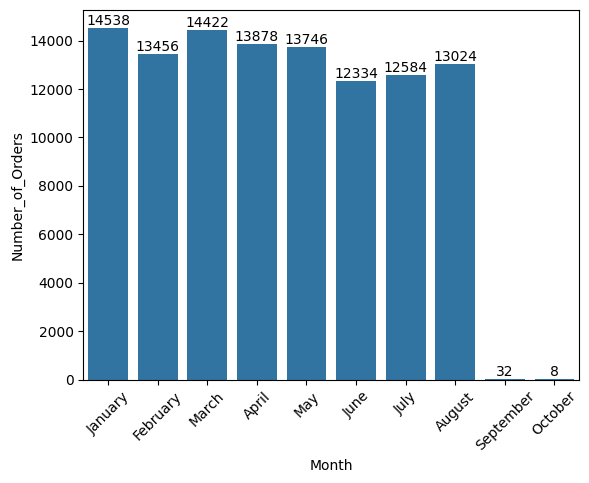

In [45]:
query = """ SELECT 
    MONTHNAME(order_purchase_timestamp) AS months,
    COUNT(order_id) AS order_count
FROM 
    orders
WHERE 
    YEAR(order_purchase_timestamp) = 2018
GROUP BY 
    MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY 
    MONTH(order_purchase_timestamp);

"""

cur.execute(query)
data = cur.fetchall();
data
monthly_sales_2018 = pd.DataFrame(data,columns=['Month','Number_of_Orders']);
monthly_sales_2018
months = ['January','February','March','April','May','June','July','August','September','October']
ax=sns.barplot(x= monthly_sales_2018['Month'],y=monthly_sales_2018['Number_of_Orders'], data = monthly_sales_2018,order=months)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

# Find Average Numbers of product per order, grouped by customer city

In [46]:
query = """ WITH count_per_order AS (
    SELECT 
        orders.order_id, 
        orders.customer_id, 
        COUNT(order_items.order_id) AS oc
    FROM 
        orders
    JOIN 
        order_items ON orders.order_id = order_items.order_id
    GROUP BY 
        orders.order_id, 
        orders.customer_id
)

SELECT 
    customers.customer_city, 
    ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM 
    customers
JOIN 
    count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY 
    customers.customer_city
ORDER BY 
    average_orders DESC;
"""

cur.execute(query)
data = cur.fetchall();
data
Avg_order_count_per_city = pd.DataFrame(data,columns=['Cities','Average_Order_Count'])
Avg_order_count_per_city

,Cities,Average_Order_Count
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
...,...,...
4105,tuiuti,2.00
4106,tibau do sul,2.00
4107,sao mamede,2.00
4108,sambaiba,2.00


# Calculate the percentage of total revenue contributed by each product category.

In [13]:
query = """ SELECT 
    products.product_category AS category,
    ROUND(
        (SUM(payments.payment_value) / 
         (SELECT SUM(payment_value) FROM payments) * 100), 
        2
    ) AS sales
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category
ORDER BY sales DESC;
"""

cur.execute(query)
data = cur.fetchall();
data
percentage_distribution_by_Category = pd.DataFrame(data,columns=['Category','Percentage_Distribution'])
percentage_distribution_by_Category.head(5)

,Category,Percentage_Distribution
0,bed table bath,21.40
1,HEALTH BEAUTY,20.71
2,computer accessories,19.81
3,Furniture Decoration,17.87
4,Watches present,17.86


# Identify the correlation between product price and the number of times a product has been purchased.

In [47]:
query = """SELECT 
    products.product_category, 
    COUNT(order_items.product_id) AS product_count,
    ROUND(AVG(order_items.price), 2) AS average_price
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
GROUP BY 
    products.product_category;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1]) #No Impact of price on the number of units sold

the correlation is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

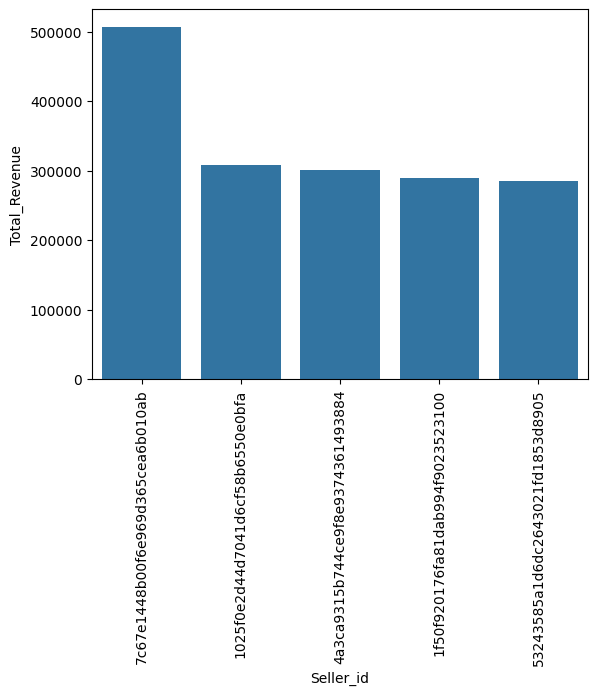

In [48]:
query = """SELECT 
    *, 
    DENSE_RANK() OVER (ORDER BY revenue DESC) AS rn
FROM (
    SELECT 
        order_items.seller_id, 
        SUM(payments.payment_value) AS revenue
    FROM 
        order_items
    JOIN 
        payments ON order_items.order_id = payments.order_id
    GROUP BY 
        order_items.seller_id
) AS a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Seller_id", "Total_Revenue","Rank"])
df=df.head();
sns.barplot(x= 'Seller_id',y='Total_Revenue',data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [49]:
query = """SELECT 
    customer_id, 
    order_purchase_timestamp, 
    payment,
    AVG(payment) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp 
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS mov_avg
FROM (
    SELECT 
        orders.customer_id, 
        orders.order_purchase_timestamp, 
        payments.payment_value AS payment
    FROM 
        payments
    JOIN 
        orders ON payments.order_id = orders.order_id
) AS a;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
...,...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

In [50]:
query = """SELECT 
    year, 
    month, 
    payment,
    SUM(payment) OVER (ORDER BY year, month) AS cumulative_sales
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS year, 
        MONTH(orders.order_purchase_timestamp) AS month, 
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM 
        payments
    JOIN 
        orders ON payments.order_id = orders.order_id
    GROUP BY 
        YEAR(orders.order_purchase_timestamp), 
        MONTH(orders.order_purchase_timestamp)
    ORDER BY 
        year, 
        month
) AS a;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Year','Month','Sales','Cummulative_Sales'])
df


,Year,Month,Sales,Cummulative_Sales
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


# Calculate the year-over-year growth rate of total sales.

In [51]:
query = """WITH a AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS year, 
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM 
        payments
    JOIN 
        orders ON payments.order_id = orders.order_id
    GROUP BY 
        YEAR(orders.order_purchase_timestamp)
    ORDER BY 
        year
)

SELECT 
    year,
    (payment - LAG(payment, 1) OVER (ORDER BY year)) / LAG(payment, 1) OVER (ORDER BY year) * 100 AS growth_per_year
FROM 
    a;

"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Year','YOY Growth Rate'])
df

,Year,YOY Growth Rate
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Identify the top 3 customers who spent the most money in each year.

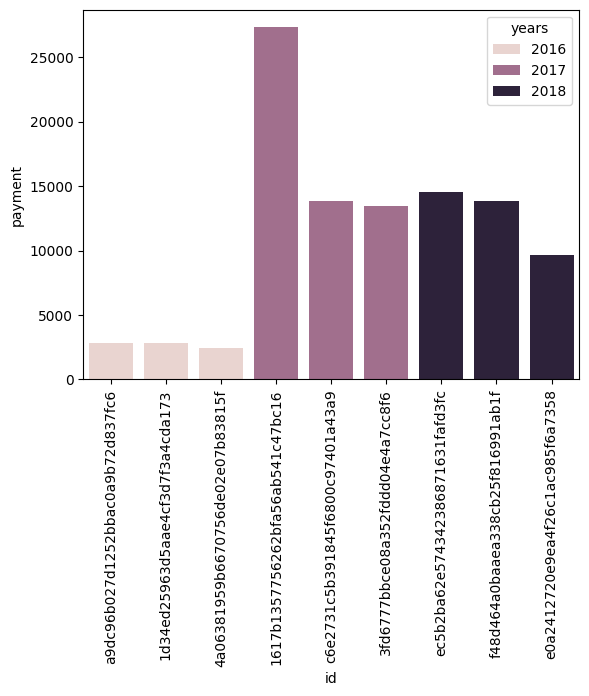

In [52]:
query = """SELECT 
    years, 
    customer_id, 
    payment, 
    d_rank
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp) 
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM 
        orders
    JOIN 
        payments ON payments.order_id = orders.order_id
    GROUP BY 
        YEAR(orders.order_purchase_timestamp), 
        orders.customer_id
) AS a
WHERE 
    d_rank <= 3
ORDER BY 
    years, 
    d_rank;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()